# **Data Collection**



In [ ]:
import pandas as pd
df = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# Display variable types in the data DataFrame
print(df.dtypes)


Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


# **Data Cleaning**



In [ ]:
# Identify missing data in the entire DataFrame
total_missing = df.isnull().sum().sum()
print(f"Total missing values in the DataFrame: {total_missing}")


Total missing values in the DataFrame: 0


In [ ]:
#Checking for duplicated
df.duplicated().sum()

1635

In [ ]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(69057, 22)

In [ ]:
df['Diabetes'] = df['Diabetes_binary']
df.drop(columns = 'Diabetes_binary', inplace=True)

In [ ]:
#Change dtype to int
df = df.astype('int32')

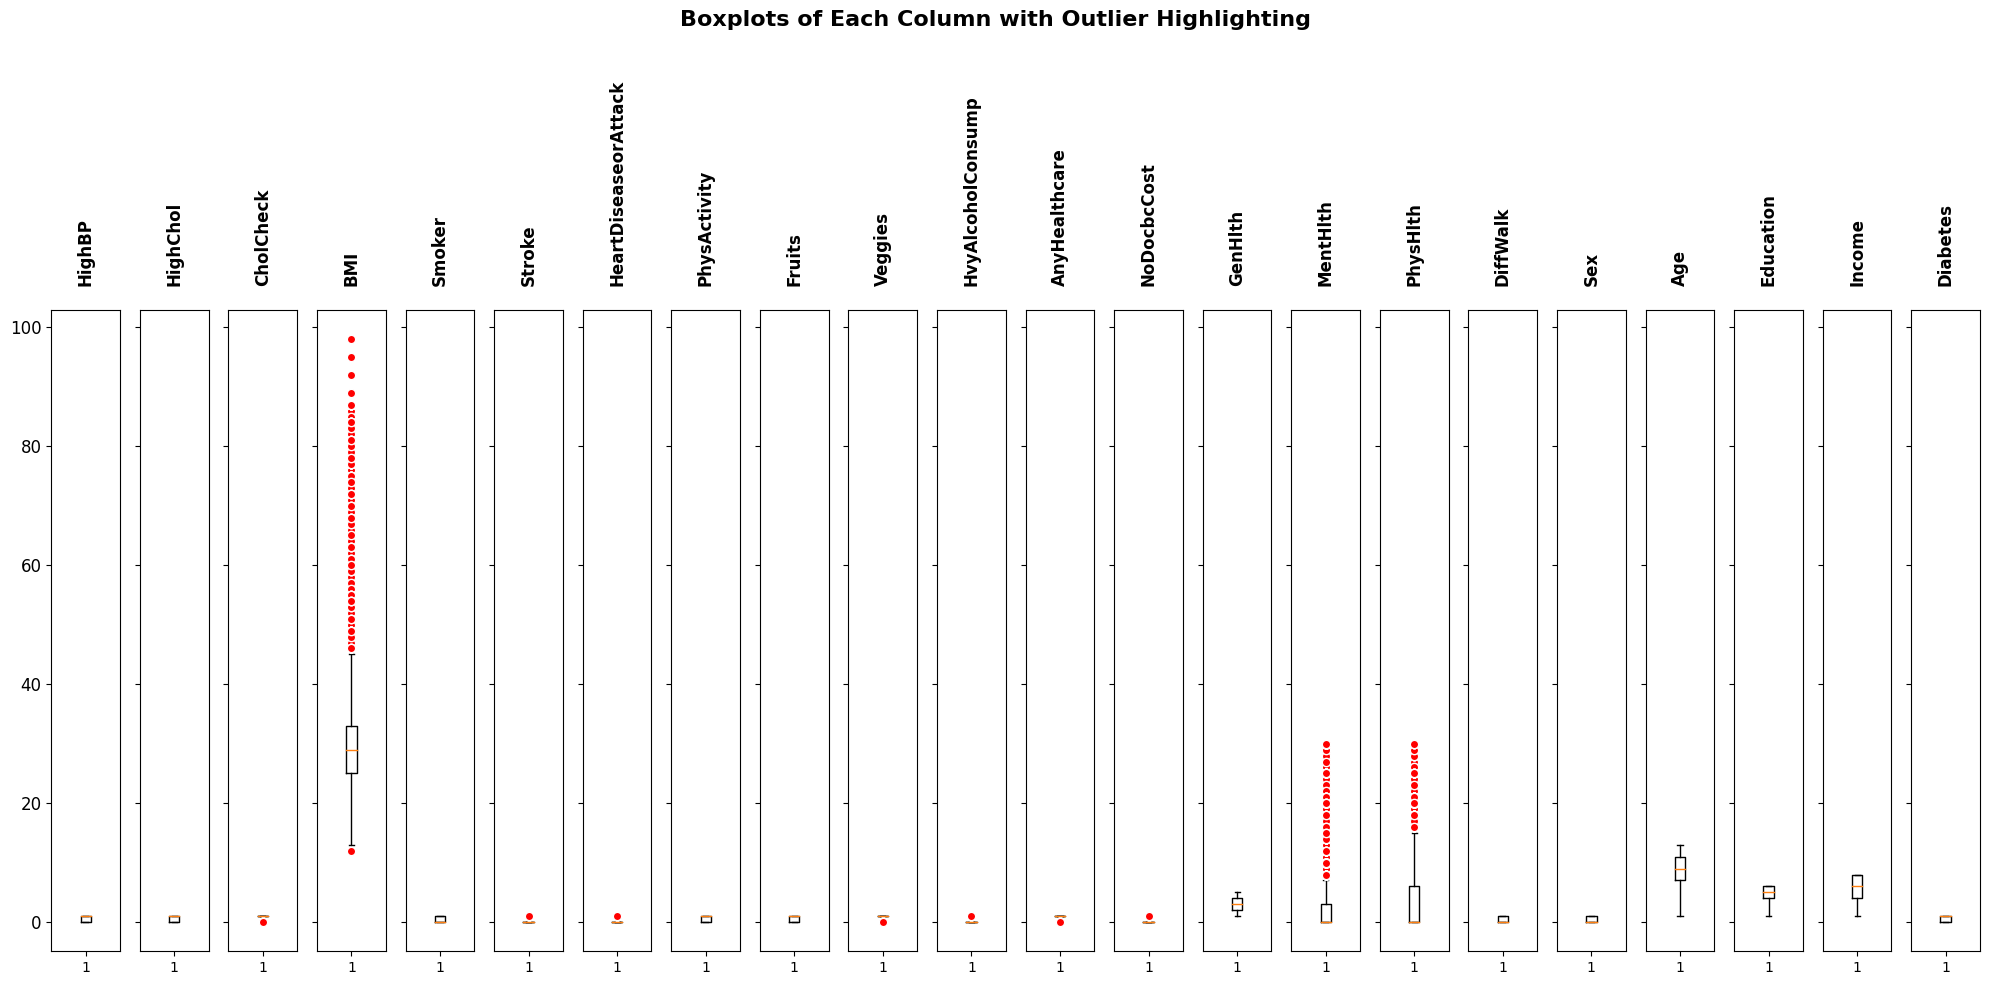

In [ ]:
import matplotlib.pyplot as plt

# Creating subplot of each column with a shared y-axis
fig, axs = plt.subplots(1, len(df.columns), figsize=(20, 10), sharey=True)

# Customizing boxplot appearance
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

# Detecting outliers in every column in the dataset
for i, ax in enumerate(axs):
    ax.boxplot(df.iloc[:, i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=12, fontweight='bold', pad=20, rotation='vertical')  # Rotate the title
    ax.tick_params(axis='y', labelsize=12)

# Adding labels and adjusting layout
fig.suptitle('Boxplots of Each Column with Outlier Highlighting', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout for the title

# Show the plot
plt.show()


In [ ]:
# Find IQR
bmi_percentile25 = df['BMI'].quantile(0.25)
bmi_percentile75 = df['BMI'].quantile(0.75)
iqr = bmi_percentile75 - bmi_percentile25  # Corrected calculation

# Find upper and lower limits
bmi_upper_limit = bmi_percentile75 + 1.5 * iqr
bmi_lower_limit = bmi_percentile25 - 1.5 * iqr

# Finding outliers for BMI
outliers_upper = df[df['BMI'] > bmi_upper_limit]
outliers_lower = df[df['BMI'] < bmi_lower_limit]

# Create new_data without outliers
new_data = df[(df['BMI'] >= bmi_lower_limit) & (df['BMI'] <= bmi_upper_limit)]


In [ ]:
# Find IQR for mental health
mentalHealth_percentile25 = df['MentHlth'].quantile(0.25)
mentalHealth_percentile75 = df['MentHlth'].quantile(0.75)
iqr = mentalHealth_percentile75 - mentalHealth_percentile25  # Corrected calculation

# Find upper and lower limits
mentalHealth_upper_limit = mentalHealth_percentile75 + 1.5 * iqr
mentalHealth_lower_limit = mentalHealth_percentile25 - 1.5 * iqr

# Finding outliers for mental health
outliers_upper = df[df['MentHlth'] > mentalHealth_upper_limit]
outliers_lower = df[df['MentHlth'] < mentalHealth_lower_limit]

# Create new_data without outliers for mental health
new_data = df[(df['MentHlth'] >= mentalHealth_lower_limit) & (df['MentHlth'] <= mentalHealth_upper_limit)]


In [ ]:
# Find IQR for physical health
phyHealth_percentile25 = df['PhysHlth'].quantile(0.25)
phyHealth_percentile75 = df['PhysHlth'].quantile(0.75)
iqr = phyHealth_percentile75 - phyHealth_percentile25  # Corrected calculation

# Find upper and lower limits
phyHealth_upper_limit = phyHealth_percentile75 + 1.5 * iqr
phyHealth_lower_limit = phyHealth_percentile25 - 1.5 * iqr

# Finding outliers for physical health
outliers_upper = df[df['PhysHlth'] > phyHealth_upper_limit]
outliers_lower = df[df['PhysHlth'] < phyHealth_lower_limit]

# Create new_data without outliers for physical health
new_data = df[(df['PhysHlth'] >= phyHealth_lower_limit) & (df['PhysHlth'] <= phyHealth_upper_limit)]


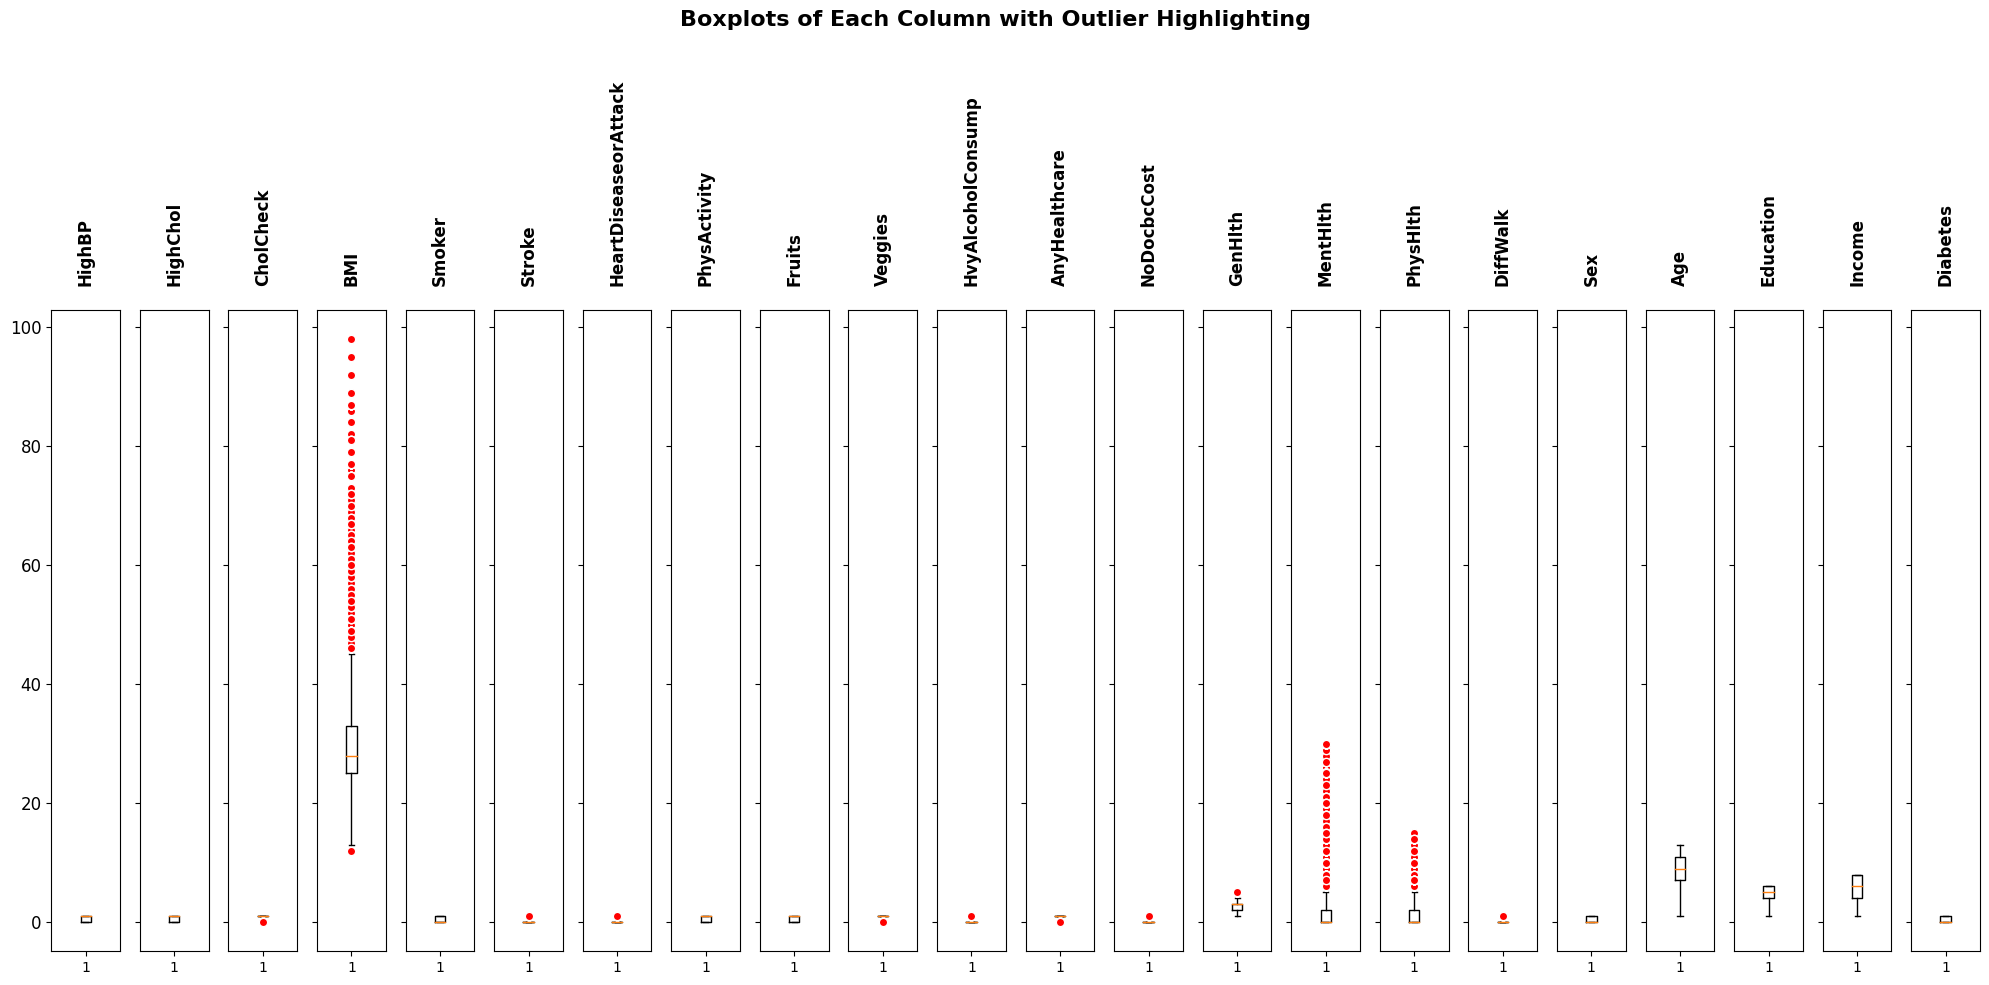

In [ ]:
import matplotlib.pyplot as plt

# Creating subplot of each column with a shared y-axis
fig, axs = plt.subplots(1, len(new_data.columns), figsize=(20, 10), sharey=True)

# Customizing boxplot appearance
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

# Detecting outliers in every column in the new dataset
for i, ax in enumerate(axs):
    ax.boxplot(new_data.iloc[:, i], flierprops=red_circle)
    ax.set_title(new_data.columns[i], fontsize=12, fontweight='bold', pad=20, rotation='vertical')  # Rotate the title
    ax.tick_params(axis='y', labelsize=12)

# Adding labels and adjusting layout
fig.suptitle('Boxplots of Each Column with Outlier Highlighting', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout for the title

# Show the plot
plt.show()

In [ ]:
# Check if outliers have been removed
original_shape = df.shape
new_shape = new_data.shape

if original_shape[0] > new_shape[0]:
    print("Outliers have been removed.")
else:
    print("No outliers have been removed.")

# Optionally, you can print the number of outliers removed
num_outliers_removed = original_shape[0] - new_shape[0]
print(f"Number of outliers removed: {num_outliers_removed}")


Outliers have been removed.
Number of outliers removed: 10620



# **Data Exploration**


In [ ]:
new_data.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
count,58437.000000,58437.000000,58437.000000,58437.000000,58437.000000,58437.000000,58437.000000,58437.000000,58437.000000,58437.000000,...,58437.000000,58437.000000,58437.000000,58437.000000,58437.000000,58437.000000,58437.000000,58437.000000,58437.000000,58437.000000
mean,0.541455,0.506956,0.972637,29.559611,0.459452,0.048685,0.124904,0.737256,0.613276,0.793795,...,0.080086,2.636771,2.644352,1.931995,0.179202,0.462635,8.517754,4.958126,5.869518,0.470763
std,0.498283,0.499956,0.163140,6.770195,0.498357,0.215210,0.330613,0.440129,0.487004,0.404583,...,0.271429,0.978376,6.572494,3.765014,0.383524,0.498606,2.925299,1.008983,2.085204,0.499149
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,2.000000,0.000000,1.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,15.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


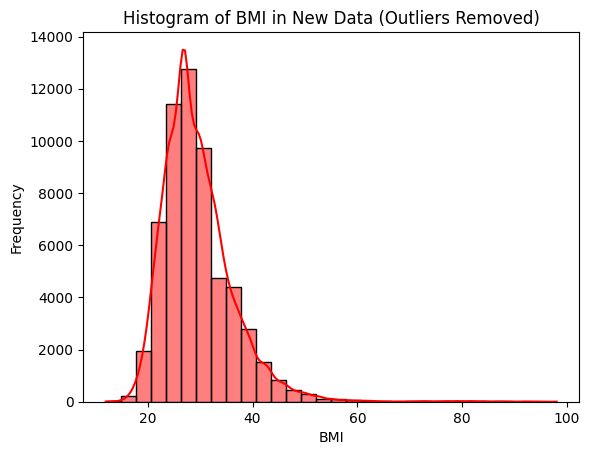

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram
sns.histplot(new_data['BMI'], bins=30, kde=True, color='red')

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI in New Data (Outliers Removed)')

# Show the plot
plt.show()


array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center'

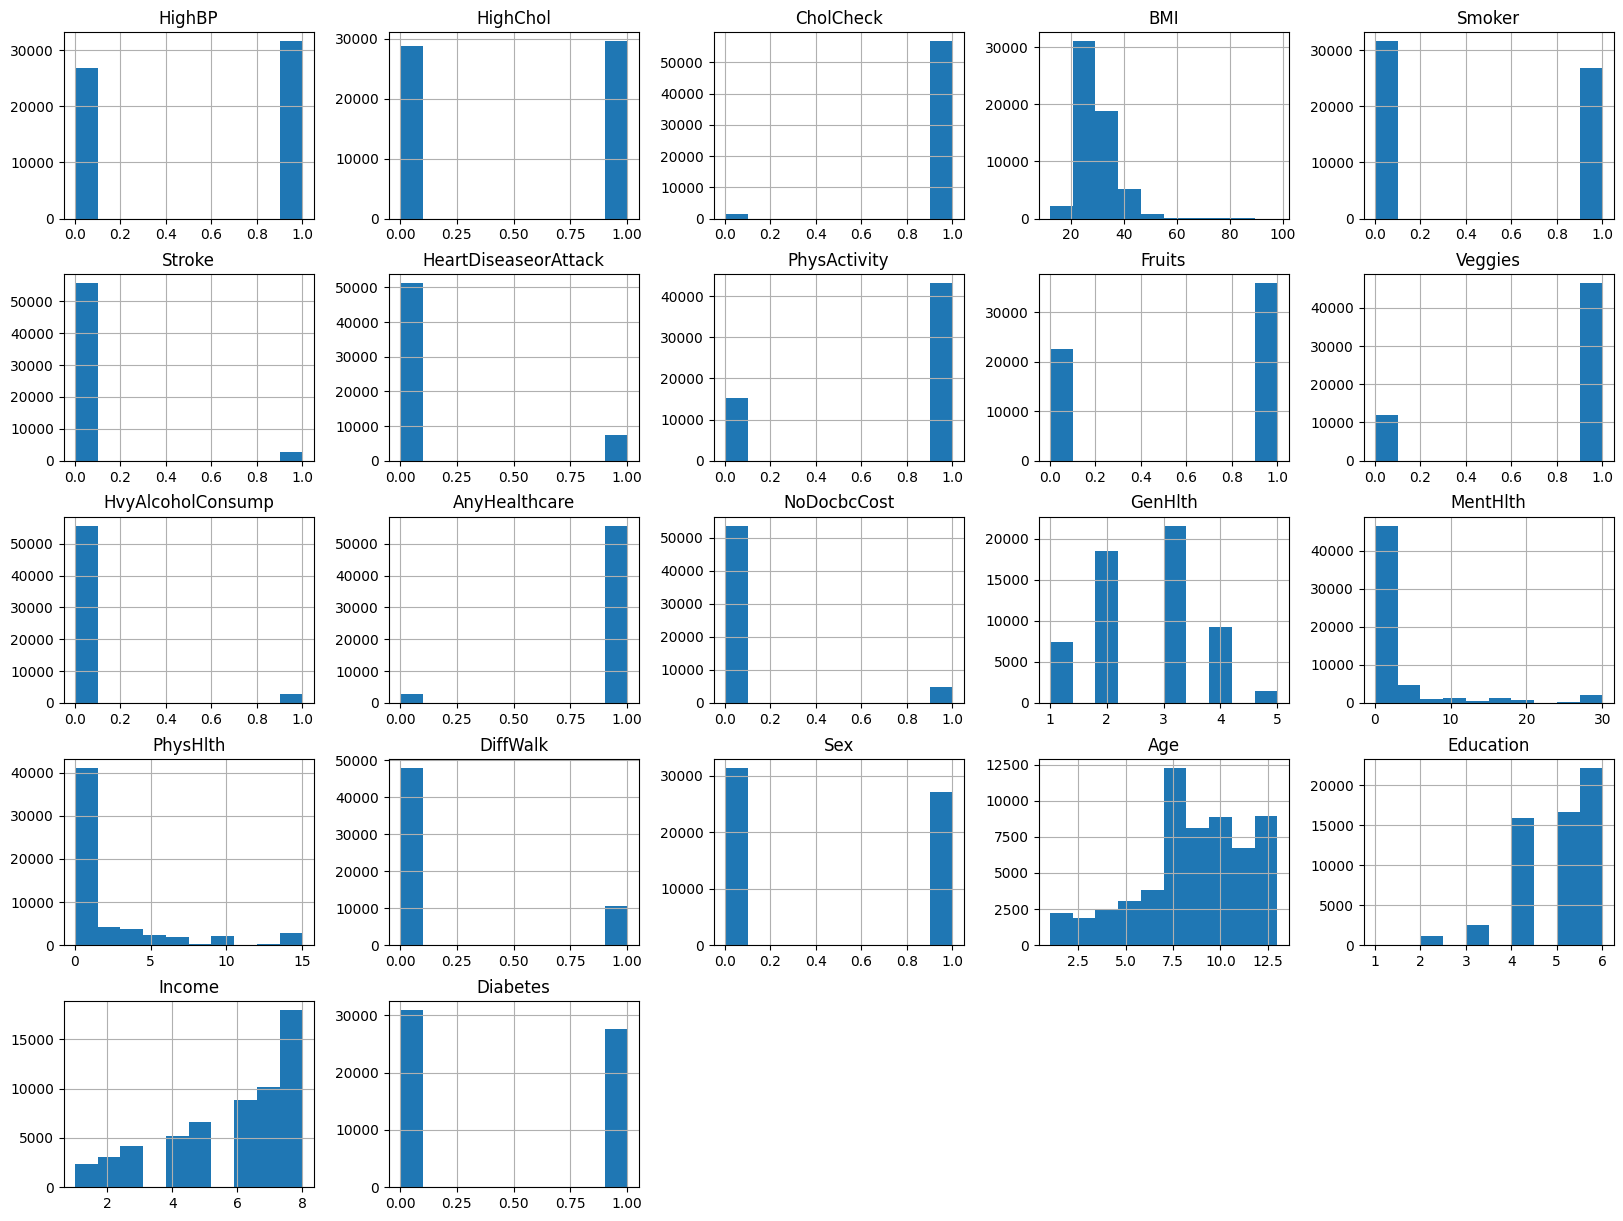

In [ ]:
new_data.hist(figsize=(20,15))

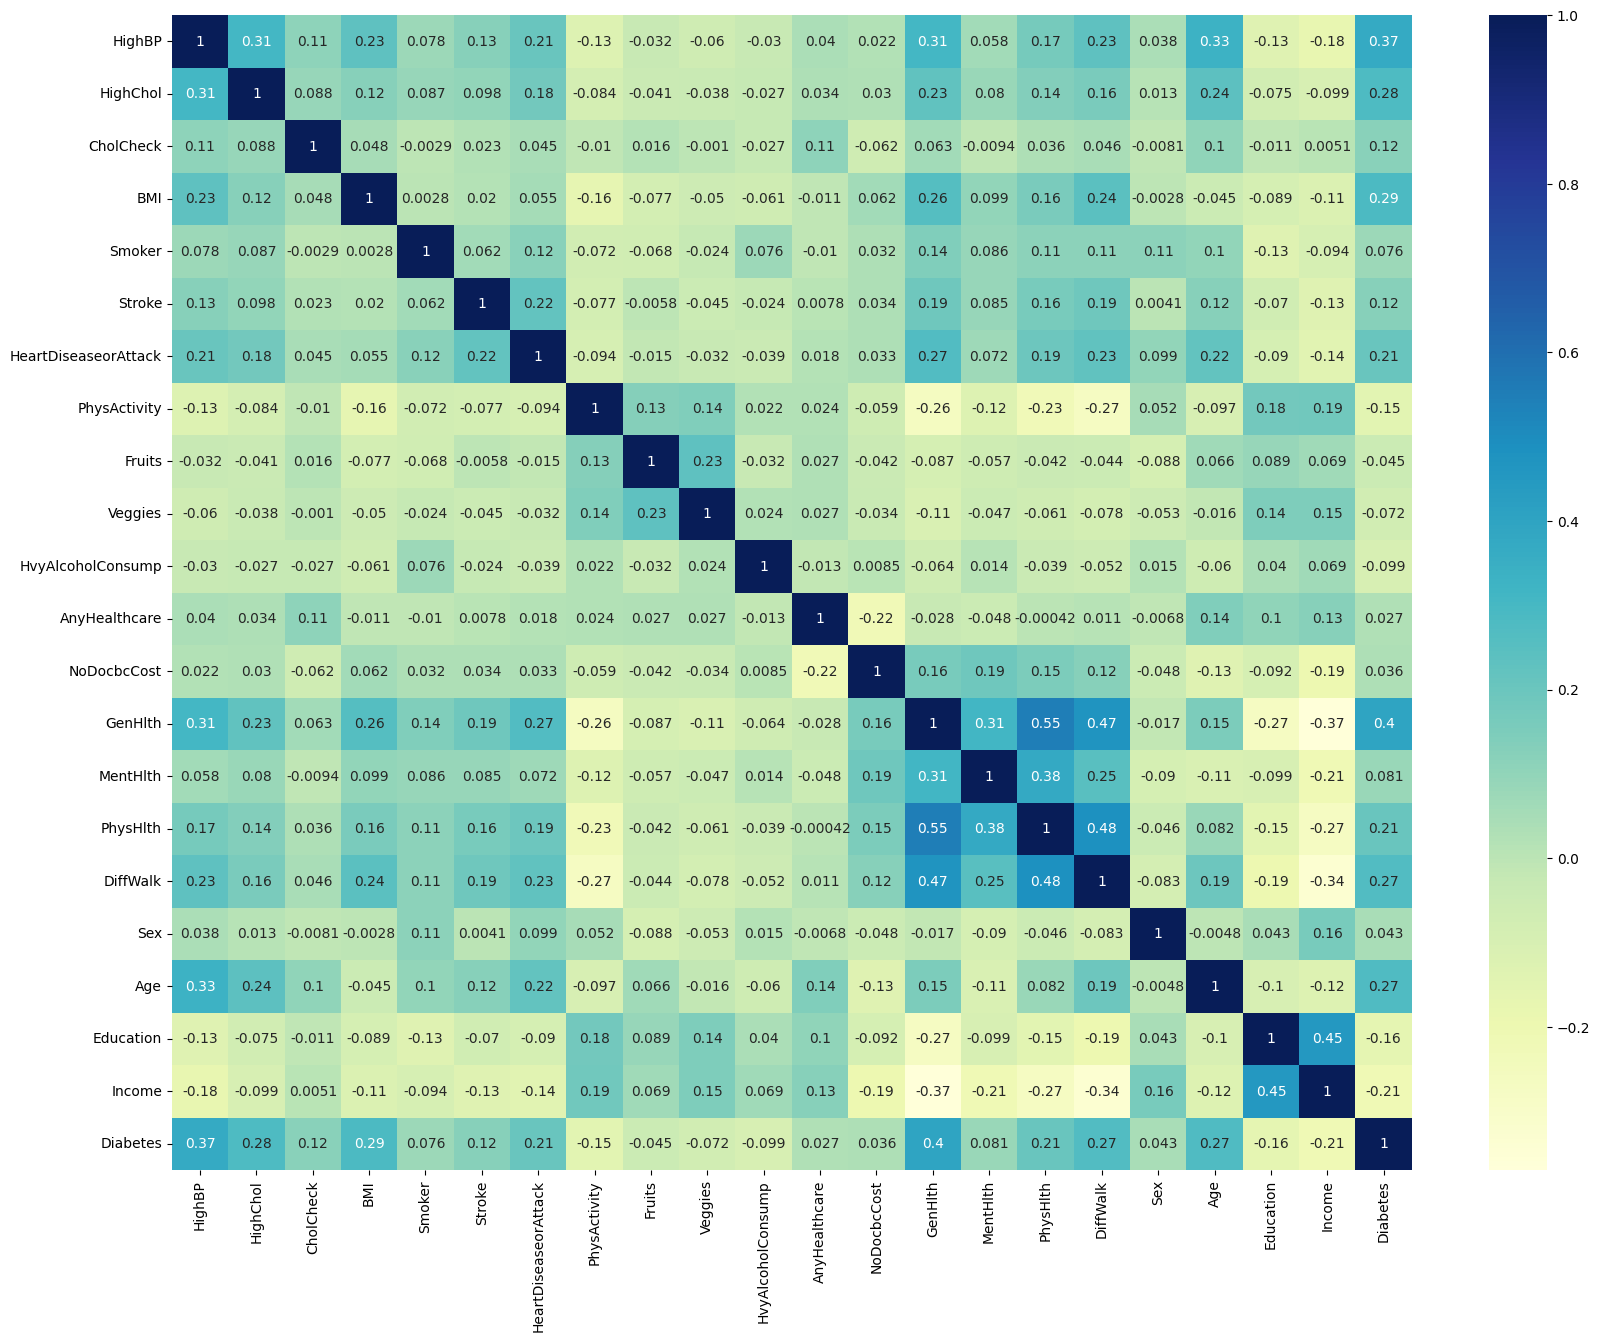

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

#Data science technique


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

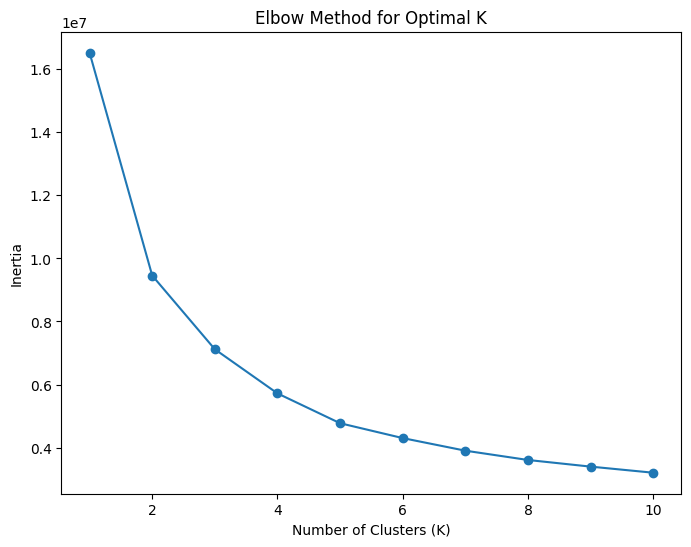

In [ ]:
from sklearn.cluster import KMeans


# Calculate inertia for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Choose the optimal number of clusters (K) based on the Elbow Method
chosen_k = 6

#  Clustering
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Summarize characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean()

# Print the summary statistics for each cluster
print(cluster_summary)

           HighBP  HighChol  CholCheck        BMI    Smoker    Stroke  \
Cluster                                                                 
0        0.749055  0.577017   0.981551  45.390309  0.432318  0.051567   
1        0.628172  0.552363   0.981319  32.507737  0.459855  0.046136   
2        0.725992  0.644659   0.987016  31.016414  0.577658  0.128736   
3        0.740493  0.704265   0.983556  32.850462  0.639517  0.165468   
4        0.427117  0.443297   0.965604  24.660298  0.443186  0.043578   
5        0.562515  0.561118   0.962282  29.855180  0.561816  0.072875   

         HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  \
Cluster                                                          ...   
0                    0.142032      0.583018  0.546344  0.755057  ...   
1                    0.133598      0.713841  0.591377  0.780168  ...   
2                    0.287359      0.516046  0.592724  0.752940  ...   
3                    0.290339      0.437307  0.522354  

In [ ]:
#  Classification
X_classification = df.drop(['Diabetes', 'Cluster'], axis=1)
y_classification = df['Diabetes']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [ ]:
# Train the Random Forest classifier with parameter tuning (GridSearchCV)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, n_jobs=-1, scoring='accuracy')  # Use parallel processing (n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and best model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2f}')

Accuracy of the model: 0.76


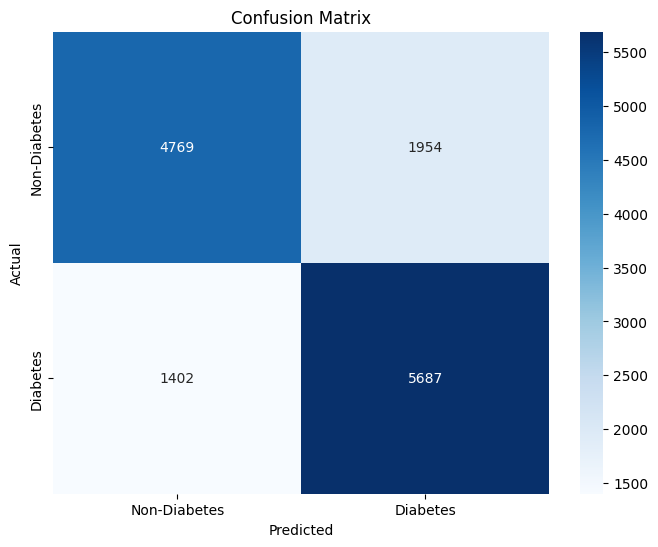

In [ ]:
from sklearn.metrics import confusion_matrix

# Interpretation - Classification Results
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      6723
           1       0.73      0.77      0.75      7089

    accuracy                           0.74     13812
   macro avg       0.74      0.74      0.74     13812
weighted avg       0.74      0.74      0.74     13812



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Accuracy: 0.7493634357494483
Precision: 0.7928239202657807
Recall: 0.6751541900073559
Confusion Matrix:
[[29110  6236]
 [11482 23864]]


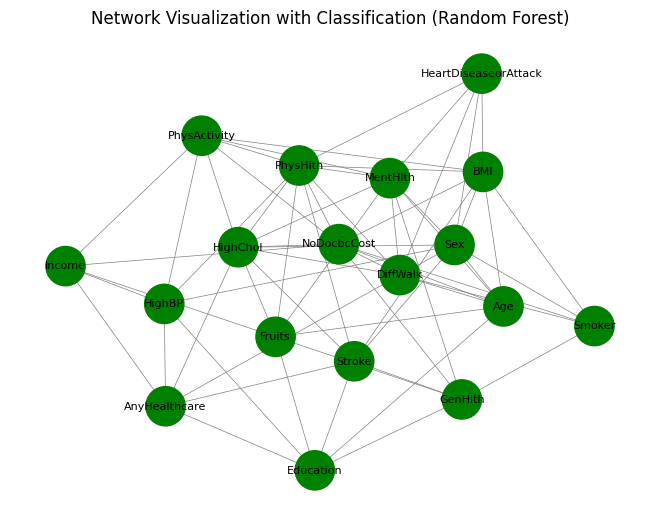

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.utils.class_weight import compute_class_weight

# Load  dataset
fail = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Define relevant columns for network visualization
columns_for_network = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke', 'BMI', 'Smoker', 'PhysActivity',
                        'Fruits', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex']

# Check if all columns in columns_for_network are present in the DataFrame
missing_columns = set(columns_for_network) - set(fail.columns)
if missing_columns:
    raise KeyError(f"Columns {missing_columns} not found in the DataFrame.")

# Binary classification target
y = fail['Diabetes_binary']

# Features for the model
X = fail[columns_for_network + ['Age', 'Education', 'Income']]

# Split the data using stratified K-fold CV for more reliable evaluation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Handle class imbalance using SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)

# Create and train a Random Forest model with hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'max_features': ['auto', 'sqrt', 'log2']}
rf_model = RandomForestClassifier(random_state=42, class_weight=dict(zip(np.unique(y_resampled), class_weights)))
grid_search = GridSearchCV(rf_model, param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
best_rf_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_rf_model.predict(X)

# Assess the performance of the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, zero_division=1)
recall = recall_score(y, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

# Create a graph
G = nx.Graph()

# Add nodes to the graph with color coding based on actual and predicted classes
for node in columns_for_network + ['Age', 'Education', 'Income']:
    if node in X.columns:
        actual_class = int(y.iloc[0])  # Assuming y has only one unique value
        predicted_class = int(y_pred[0])
        color = 'green' if actual_class == predicted_class else 'red'
        G.add_node(node, color=color)

# Randomly add edges (for demonstration purposes)
for node1 in columns_for_network + ['Age', 'Education', 'Income']:
    for node2 in columns_for_network + ['Age', 'Education', 'Income']:
        if node1 != node2 and np.random.rand() > 0.8:
            G.add_edge(node1, node2)

# Draw the graph with color-coded nodes
pos = nx.spring_layout(G)
node_colors = [G.nodes[node]['color'] for node in G.nodes]
nx.draw(G, pos, with_labels=True, font_size=8, node_size=800, font_color='black', node_color=node_colors, edge_color='gray', width=0.5)
plt.title('Network Visualization with Classification (Random Forest)')
plt.show()

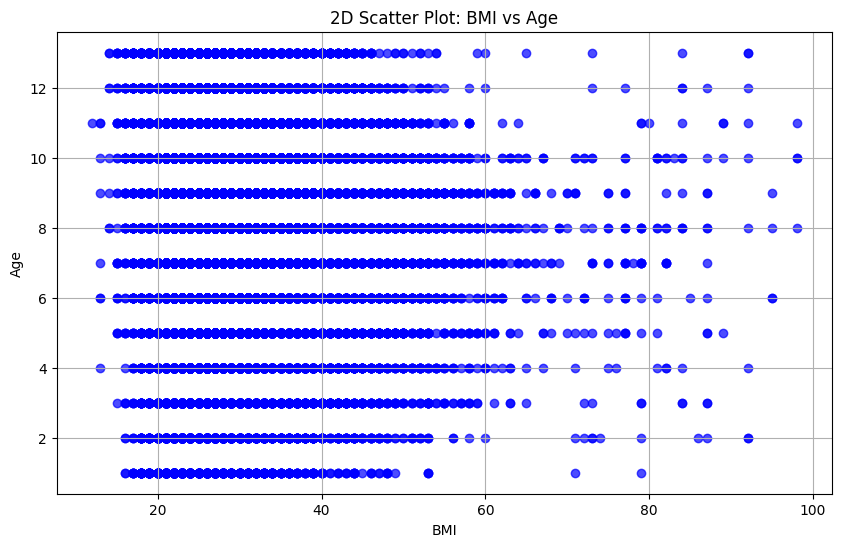

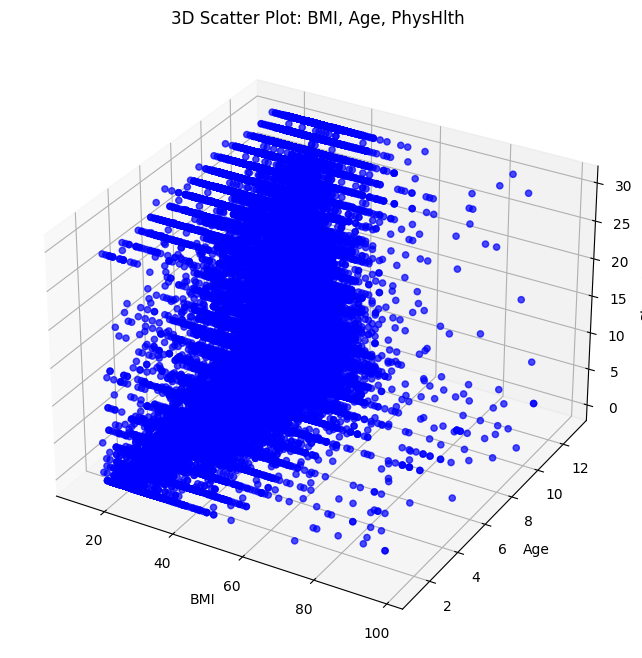

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

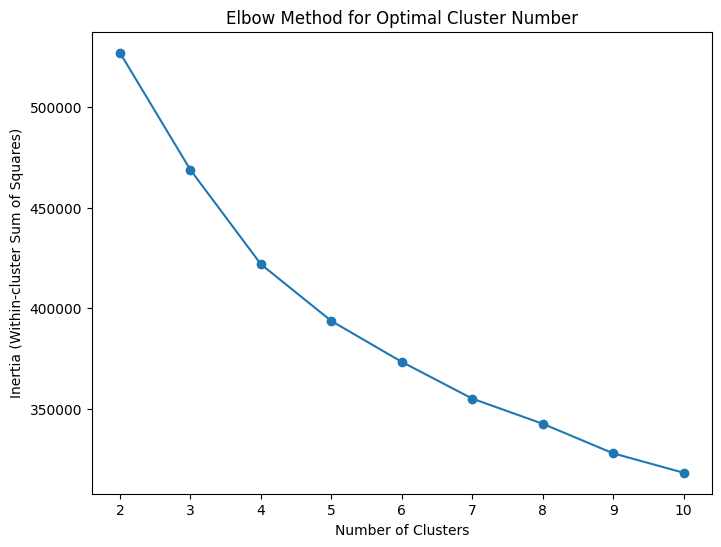

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (KMeans): 0.16130742672680723
Calinski-Harabasz Index (KMeans): 12626.296793904155
Davies-Bouldin Index (KMeans): 2.0863591764365403

Cluster Profiles (KMeans):
              Cluster_1  Cluster_2  Cluster_3
BMI           32.971873  27.274946  30.884838
HighBP         0.756022   0.007255   0.988398
HighChol       0.700932   0.313867   0.644201
Smoker         0.626185   0.394936   0.484283
PhysActivity   0.411655   0.819834   0.720557
Fruits         0.530925   0.650296   0.611113
Veggies        0.699378   0.836447   0.783360
GenHlth        4.195649   2.218978   2.822398
PhysHlth      24.705983   1.469658   1.727663


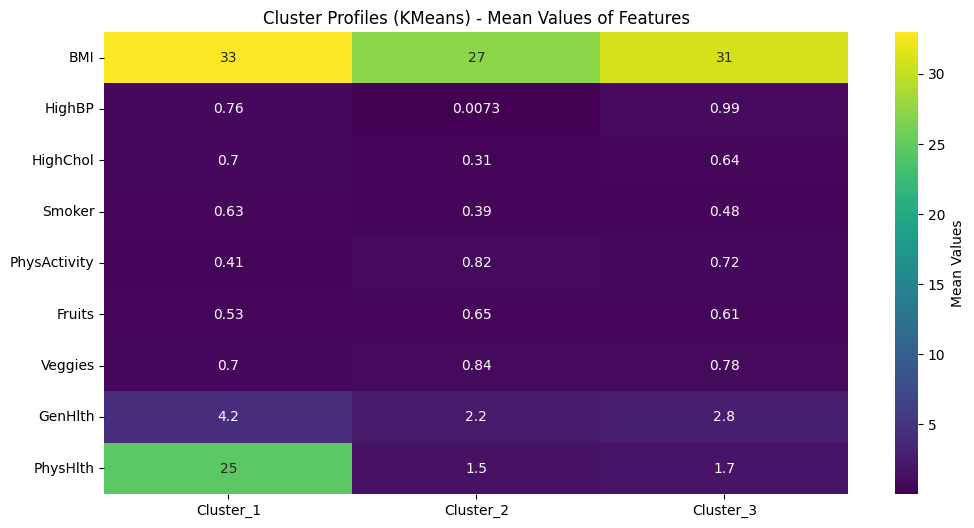

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sns

# Load your dataset
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Specify the metrics for the scatter plot
x_metric = 'BMI'
y_metric = 'Age'
z_metric = 'PhysHlth'

# Create a 2D Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df[x_metric], df[y_metric], c='blue', alpha=0.7)
plt.title(f'2D Scatter Plot: {x_metric} vs {y_metric}')
plt.xlabel(x_metric)
plt.ylabel(y_metric)
plt.grid(True)
plt.show()

# Create a 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x_metric], df[y_metric], df[z_metric], c='blue', alpha=0.7)
ax.set_title(f'3D Scatter Plot: {x_metric}, {y_metric}, {z_metric}')
ax.set_xlabel(x_metric)
ax.set_ylabel(y_metric)
ax.set_zlabel(z_metric)
plt.show()

# Select features for clustering
features_for_clustering = ['BMI', 'HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'GenHlth', 'PhysHlth']

# Create a subset of the DataFrame with selected features
data_for_clustering = df[features_for_clustering]

# Standardize the features to ensure they have similar scales
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Optimal number of clusters using the Elbow method
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_for_clustering_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()

# Choose the optimal number of clusters (you can adjust this manually based on the plot)
optimal_clusters_kmeans = 3

# Instantiate and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters_kmeans, random_state=42)
predicted_labels_kmeans = kmeans.fit_predict(data_for_clustering_scaled)

# Add the predicted cluster labels to your DataFrame
df['Predicted_Cluster_Labels_KMeans'] = predicted_labels_kmeans

# Evaluate clustering metrics for KMeans
silhouette_score_kmeans = metrics.silhouette_score(data_for_clustering_scaled, predicted_labels_kmeans)
calinski_harabasz_score_kmeans = metrics.calinski_harabasz_score(data_for_clustering_scaled, predicted_labels_kmeans)
davies_bouldin_index_kmeans = metrics.davies_bouldin_score(data_for_clustering_scaled, predicted_labels_kmeans)

# Print or use the metrics as needed
print(f'Silhouette Score (KMeans): {silhouette_score_kmeans}')
print(f'Calinski-Harabasz Index (KMeans): {calinski_harabasz_score_kmeans}')
print(f'Davies-Bouldin Index (KMeans): {davies_bouldin_index_kmeans}')

# Profile and interpret clusters for KMeans
cluster_centers_kmeans = kmeans.cluster_centers_
nearest_points_kmeans, _ = pairwise_distances_argmin_min(cluster_centers_kmeans, data_for_clustering_scaled)

cluster_profiles_kmeans = pd.DataFrame()
for i in range(optimal_clusters_kmeans):
    cluster_indices = df[df['Predicted_Cluster_Labels_KMeans'] == i].index
    cluster_profile_kmeans = df.loc[cluster_indices, features_for_clustering].mean()
    cluster_profiles_kmeans[f'Cluster_{i+1}'] = cluster_profile_kmeans

print('\nCluster Profiles (KMeans):')
print(cluster_profiles_kmeans)

# Visualize cluster profiles using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profiles_kmeans, annot=True, cmap='viridis', cbar_kws={'label': 'Mean Values'})
plt.title('Cluster Profiles (KMeans) - Mean Values of Features')
plt.show()
